In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import scipy.stats as stats
from lmfit import models
import math

In [20]:
specific_rows = [9,10]

df = pd.read_csv('first_results.csv', header=None, usecols=[9,10])

df

,9,10
0,0.05160,2.42
1,0.05164,2.42
2,0.05168,2.40
3,0.05172,2.40
4,0.05176,2.40
...,...,...
2495,0.15140,1.64
2496,0.15144,1.66
2497,0.15148,1.64
2498,0.15152,1.64


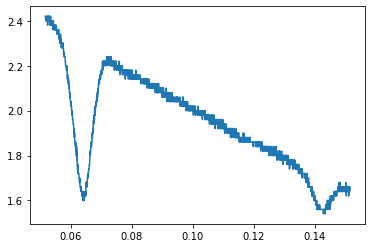

In [21]:
plt.plot(df[9], df[10])

In [22]:
# Fit functions

def LinFunc(x, a, b):
    y = a*x+b
    return y

Lin_model = models.Model(LinFunc)
gauss_model_1 = models.GaussianModel(prefix="A_")
gauss_model_2 = models.GaussianModel(prefix="B_")

tot_model = Lin_model + gauss_model_1 + gauss_model_2

print(f'parameter names: {tot_model.param_names}')
print(f'independent variables: {tot_model.independent_vars}')

parameter names: ['a', 'b', 'A_amplitude', 'A_center', 'A_sigma', 'B_amplitude', 'B_center', 'B_sigma']
independent variables: ['x']


In [23]:
#Calculate some params

a = (df[10][0]-df[10][len(df[10])-1])/(df[9][0]-df[9][len(df[10])-1])

b = 2.5

[[Model]]
    Model(LinFunc)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 2500
    # variables        = 2
    chi-square         = 44.6296587
    reduced chi-square = 0.01786616
    Akaike info crit   = -10060.1184
    Bayesian info crit = -10048.4704
    R-squared          = 0.61622098
[[Variables]]
    a: -5.86489273 +/- 0.09260538 (1.58%) (init = -7.60304)
    b:  2.53775574 +/- 0.00977933 (0.39%) (init = 2.5)
[[Correlations]] (unreported correlations are < 0.100)
    C(a, b) = -0.962


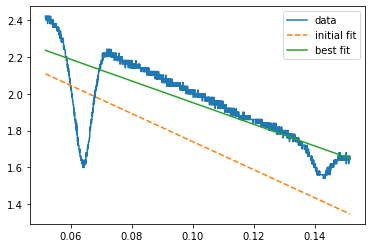

In [24]:
lin_fit = Lin_model.fit(df[10], x=df[9], a=a, b=b)

print(lin_fit.fit_report())


plt.plot(df[9], df[10], label='data')
plt.plot(df[9], lin_fit.init_fit, '--', label='initial fit')
plt.plot(df[9], lin_fit.best_fit, '-', label='best fit')
plt.legend()

[[Model]]
    ((Model(LinFunc) + Model(gaussian, prefix='A_')) + Model(gaussian, prefix='B_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 145
    # data points      = 2500
    # variables        = 8
    chi-square         = 0.49167130
    reduced chi-square = 1.9730e-04
    Akaike info crit   = -21318.9772
    Bayesian info crit = -21272.3849
    R-squared          = 0.99577202
[[Variables]]
    a:           -7.62550209 +/- 0.01437224 (0.19%) (init = -7.60304)
    b:            2.77408266 +/- 0.00150253 (0.05%) (init = 2.5)
    A_amplitude: -0.00485165 +/- 1.4912e-05 (0.31%) (init = -0.6)
    A_center:     0.06388103 +/- 7.7414e-06 (0.01%) (init = 0.062)
    A_sigma:      0.00292770 +/- 8.7032e-06 (0.30%) (init = 1.8227e-05)
    B_amplitude: -8.9694e-04 +/- 1.4028e-05 (1.56%) (init = -0.2)
    B_center:     0.14192488 +/- 3.5653e-05 (0.03%) (init = 0.14)
    B_sigma:      0.00263124 +/- 3.9944e-05 (1.52%) (init = 1.8227e-05)
    A_fwhm:       0.0068942

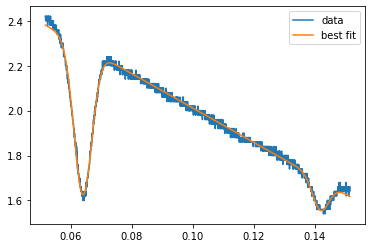

In [25]:
# params = tot_model.make_params(a=a, b=b, amp1=-1, cen1=0.062, wid1=0.005, amp2=-0.3, cen2=0.14, wid2=0.005)
result = tot_model.fit(df[10], x=df[9], a=a, b=b, A_amplitude=-0.6, A_center=0.062, A_sigma=1.8227e-05, B_amplitude=-0.2, B_center=0.14, B_sigma=1.8227e-05)



print(result.fit_report())

plt.plot(df[9], df[10], label='data')
#plt.plot(df[9], result.init_fit, '--', label='initial fit')
plt.plot(df[9], result.best_fit, '-', label='best fit')
plt.legend()

In [27]:
# proof of concept

k = 1.38e-23 # bolzmann constant
m = 86.909184 * 1.66053907e-27 # mass of rubidium
c = 3e8 # speed of light
f_0 = 384e12 # rest freq
sigma1=result.params.get("A_sigma").value
sigma2=result.params.get("B_sigma").value

T1 = (sigma1**2*m*c**2)/(k*f_0)
T2 = (sigma2**2*m*c**2)/(k*f_0)

print(T1)
print(T2)


2.100875891949782e-05
1.6969404146825702e-05
